**Parcial 2 Laboratorio de Recopilación e Integración de Datos** - ISTEA 2025 - *Grupo 1*

* Boyd Ronald
* Carrero Nicolás Agustín
* Figueredo Rodrigo
* Levi Ezequiel
* Sala Nicolás Matías
* Zerbi María Florencia

In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importación del Dataset
tp = pd.read_excel("BBDD_evaluacion.xlsx")
# Visualización de las primeras filas del dataset
tp.head()

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,NaN,0.000011,0.010175,6.893503e+05,Low
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High
4,Chaco,9.832643e+06,7.51758,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High


In [3]:
# Tipo de datos de cada columna
tp.dtypes
print("Tipos de datos de cada columna:\n", tp.dtypes)

Tipos de datos de cada columna:
 PROVINCIA                  object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                       float64
movie_theatres_per_cap    float64
doctors_per_cap           float64
Score                     float64
poverty_index              object
dtype: object


In [4]:
# Dimensiones de la tabla
tp.shape
print(f"Las dimensiones del DataFrame son: {tp.shape[0]} filas y {tp.shape[1]} columnas")

Las dimensiones del DataFrame son: 22 filas y 13 columnas


In [5]:
# Búsqueda de datos duplicados
tp.duplicated().sum()
print("Número de filas duplicadas:", tp.duplicated().sum())

Número de filas duplicadas: 0


In [6]:
# Existencia de datos ausentes y cantidad por columna
tp.isnull().sum()
print("Datos ausentes por columna:\n", tp.isnull().sum())

Datos ausentes por columna:
 PROVINCIA                 0
gdp                       0
illiteracy                2
poverty                   2
deficient_infra           2
school_dropout            0
no_healthcare             2
birth_mortal              2
pop                       1
movie_theatres_per_cap    0
doctors_per_cap           0
Score                     0
poverty_index             0
dtype: int64


**Variable illiteracy** - *Grupo 1*

In [7]:
# Renombrar la columna “illiteracy” por “Analfabetismo”
tp.rename(columns={'illiteracy': 'Analfabetismo'}, inplace=True)
print("Columna 'illiteracy' renombrada a 'Analfabetismo':\n", tp[['Analfabetismo']].head())

Columna 'illiteracy' renombrada a 'Analfabetismo':
    Analfabetismo
0            NaN
1        2.34414
2            NaN
3        5.60242
4        7.51758


In [8]:
# Reemplazar los 3 primeros registros de la variable renombrada según la sig.fórmula: 2*max(Analfabetismo)
tp.loc[:2, 'Analfabetismo'] = 2 * tp['Analfabetismo'].max()
print("Primeros 3 registros de 'Analfabetismo' reemplazados:\n", tp['Analfabetismo'].head(3))

Primeros 3 registros de 'Analfabetismo' reemplazados:
 0    15.03516
1    15.03516
2    15.03516
Name: Analfabetismo, dtype: float64


In [9]:
# Verificar la existencia de outliers, creando una nueva columna llamada “Outliers” que clasifique los valores atípicos como: “Upper_bound”, “lower_bound”, “Normal.
q1 = tp['Analfabetismo'].quantile(0.25)
q3 = tp['Analfabetismo'].quantile(0.75)

iqr = q3 - q1
limiteInferior = q1 - (1.5 * iqr)
limiteSuperior = q3 + (1.5 * iqr)

tp['Outliers'] = 'Normal'
tp.loc[tp['Analfabetismo'] > limiteSuperior, 'Outliers'] = 'Upper_bound'
tp.loc[tp['Analfabetismo'] < limiteInferior, 'Outliers'] = 'Lower_bound'
print("Clasificación de outliers:\n", tp[['Analfabetismo', 'Outliers']])

Clasificación de outliers:
     Analfabetismo     Outliers
0       15.035160  Upper_bound
1       15.035160  Upper_bound
2       15.035160  Upper_bound
3        5.602420       Normal
4        7.517580       Normal
5        1.548060       Normal
6        3.185580       Normal
7        4.610640       Normal
8        2.151390       Normal
9        1.539300       Normal
10       2.773210       Normal
11       2.200200       Normal
12       6.863950       Normal
13       1.943750       Normal
14       2.031420       Normal
15       3.346090       Normal
16       2.963260       Normal
17       3.433650       Normal
18       0.791485       Normal
19       1.975940       Normal
20       6.272090       Normal
21       3.770370       Normal


              PROVINCIA      Región
0          Buenos Aires     Central
1             Catamarca       Norte
2               Córdoba     Central
3            Corrientes     Central
4                 Chaco       Norte
5                Chubut  Patagonica
6            Entre Ríos     Central
7               Formosa       Norte
8                 Jujuy       Norte
9              La Pampa     Central
10             La Rioja       Norte
11              Mendoza        Cuyo
12             Misiones       Norte
13              Neuquén  Patagonica
14            Río Negro  Patagonica
15                Salta       Norte
16             San Juan        Cuyo
17             San Luis        Cuyo
18           Santa Cruz  Patagonica
19             Santa Fe     Central
20  Santiago del Estero       Norte
21              Tucumán       Norte


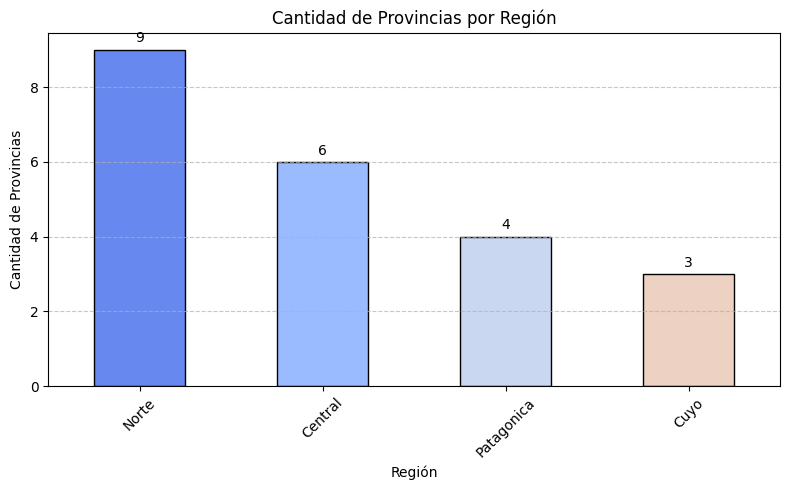

In [ ]:
# Crear una nueva columna llamada “Región” que contenga 4 zonas: Norte, Cuyo, Central, Patagónica. Asignar a cada región las provincias correspondientes. Graficar.

Norte = ['Salta', 'Jujuy', 'Tucumán', 'Catamarca', 'Santiago del Estero', 'Formosa', 'Chaco', 'Misiones', 'La Rioja']
Cuyo = ['Mendoza', 'San Juan', 'San Luis']
Central = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Entre Ríos', 'La Pampa', 'Corrientes', 'CABA']
Patagonica = ['Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego']

tp['Región'] = tp['PROVINCIA'].apply(lambda x: "Norte" if x in Norte else ("Cuyo" if x in Cuyo else ("Central" if x in Central else "Patagonica")))

print(tp[['PROVINCIA', 'Región']])


# Gráfico
conteo_regiones = tp['Región'].value_counts()
plt.figure(figsize=(8, 5))
ax = conteo_regiones.plot(kind='bar', color=sns.color_palette("coolwarm"), edgecolor='black')
ax.bar_label(ax.containers[0], padding=3)
plt.title('Cantidad de Provincias por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Provincias')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Región
Central       7.062260
Cuyo          2.865703
Norte         5.815609
Patagonica    1.578679
Name: Analfabetismo, dtype: float64


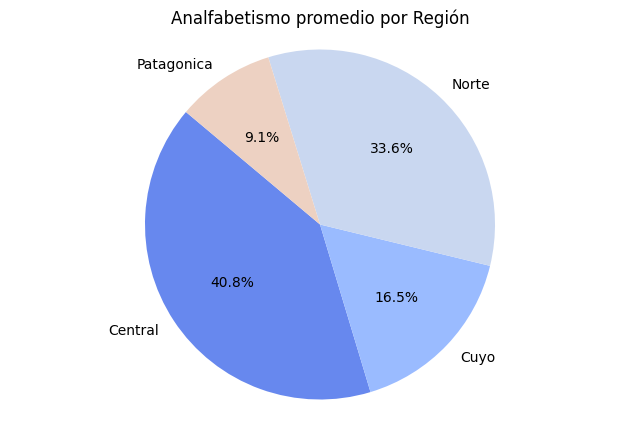

In [11]:
# Agrupar los datos de la variable renombrada en función de las 4 regiones. Graficar.
grupo_regiones = tp.groupby('Región')['Analfabetismo'].mean()
#tp.groupby('Región').size()
print(grupo_regiones)

# Graficar
plt.figure(figsize=(8, 5))
grupo_regiones.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title('Analfabetismo promedio por Región')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [12]:
# Crear una variable llamada “Prov-Reg” que “una” el nombre de la provincia y de la Región.
tp['Prov-Reg'] = tp['PROVINCIA'] + ' - ' + tp['Región']
print("Nueva columna 'Prov-Reg':\n", tp['Prov-Reg'])

Nueva columna 'Prov-Reg':
 0          Buenos Aires - Central
1               Catamarca - Norte
2               Córdoba - Central
3            Corrientes - Central
4                   Chaco - Norte
5             Chubut - Patagonica
6            Entre Ríos - Central
7                 Formosa - Norte
8                   Jujuy - Norte
9              La Pampa - Central
10               La Rioja - Norte
11                 Mendoza - Cuyo
12               Misiones - Norte
13           Neuquén - Patagonica
14         Río Negro - Patagonica
15                  Salta - Norte
16                San Juan - Cuyo
17                San Luis - Cuyo
18        Santa Cruz - Patagonica
19             Santa Fe - Central
20    Santiago del Estero - Norte
21                Tucumán - Norte
Name: Prov-Reg, dtype: object


Nueva columna 'Ratio':
 0     0.354824
1     0.287257
2     0.354824
3     0.132215
4     0.143628
5     0.245151
6     0.075178
7     0.088089
8     0.041104
9     0.036327
10    0.052984
11    0.255923
12    0.131140
13    0.307813
14    0.321696
15    0.063929
16    0.344681
17    0.399396
18    0.125340
19    0.046631
20    0.119832
21    0.072035
Name: Ratio, dtype: float64


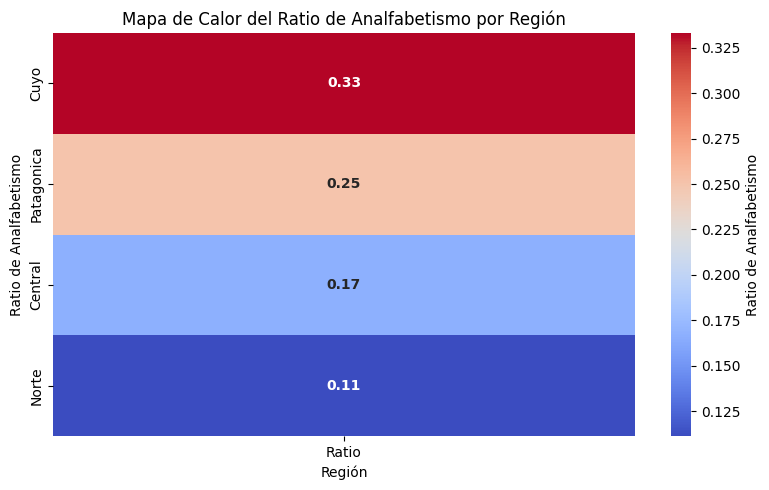

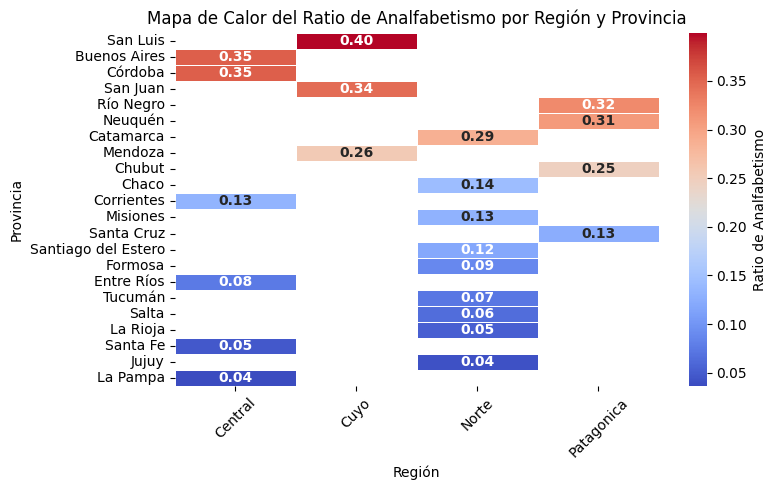

In [13]:
# Crear un ratio que relacione el valor total de la variable renombrada de cada región en relación a las provincias correspondientes. Graficar.
tp['Ratio'] = tp['Analfabetismo'] / tp.groupby('Región')['Analfabetismo'].transform('sum')
print("Nueva columna 'Ratio':\n", tp['Ratio'])

# Graficar
# Ratio por Región
plt.figure(figsize=(8, 5))
sns.heatmap(tp.pivot_table(index='Región', values='Ratio', aggfunc='mean').sort_values(by='Ratio', ascending=False), annot=True, cmap='coolwarm', cbar_kws={'label': 'Ratio de Analfabetismo'},annot_kws={"weight": "bold"})
plt.title('Mapa de Calor del Ratio de Analfabetismo por Región')
plt.xlabel('Región')
plt.ylabel('Ratio de Analfabetismo')
plt.tight_layout()
plt.show()

# Ratio por Provincia y Región
promedios = tp.groupby('PROVINCIA', observed=False)['Ratio'].mean().sort_values(ascending=False)
tp['PROVINCIA'] = pd.Categorical(tp['PROVINCIA'], categories=promedios.index, ordered=True)
heatmap_data = tp.pivot_table(index='PROVINCIA', columns='Región', values='Ratio', fill_value=None, observed=False)
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5,cbar_kws={'label': 'Ratio de Analfabetismo'},annot_kws={"weight": "bold"})
plt.title('Mapa de Calor del Ratio de Analfabetismo por Región y Provincia')
plt.xlabel('Región')
plt.ylabel('Provincia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Filtrar los datos, mostrando los resultados de las regiones: Central y Patagónica.
tp_filtrado = tp[tp['Región'].isin(['Central', 'Patagonica'])]
print("Datos filtrados para las regiones Central y Patagónica:")
tp_filtrado

Datos filtrados para las regiones Central y Patagónica:


,PROVINCIA,gdp,Analfabetismo,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,Outliers,Región,Prov-Reg,Ratio
0,Buenos Aires,2.926899e+08,15.035160,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle,Upper_bound,Central,Buenos Aires - Central,0.354824
2,Córdoba,6.936374e+07,15.035160,5.382380,10.436086,1.035056,45.7640,NaN,NaN,0.000011,0.010175,6.893503e+05,Low,Upper_bound,Central,Córdoba - Central,0.354824
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High,Normal,Central,Corrientes - Central,0.132215
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle,Normal,Patagonica,Chubut - Patagonica,0.245151
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low,Normal,Central,Entre Ríos - Central,0.075178
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low,Normal,Central,La Pampa - Central,0.036327
13,Neuquén,2.256411e+07,1.943750,9.456635,11.267278,1.393504,48.7431,3.3,551266.0,0.000009,0.005067,1.670532e+05,High,Normal,Patagonica,Neuquén - Patagonica,0.307813
14,Río Negro,1.026458e+07,2.031420,8.678391,14.885444,0.408042,49.9463,0.8,638645.0,0.000009,0.004898,7.983171e+05,Middle,Normal,Patagonica,Río Negro - Patagonica,0.321696
18,Santa Cruz,1.166374e+07,0.791485,8.024762,7.411364,0.289262,29.2321,3.3,273964.0,0.000011,0.004271,8.302183e+04,Middle,Normal,Patagonica,Santa Cruz - Patagonica,0.125340
19,Santa Fe,8.158869e+07,1.975940,6.081012,11.869195,2.872181,41.9660,2.6,3194537.0,0.000007,0.006672,1.228670e+06,Low,Normal,Central,Santa Fe - Central,0.046631


In [15]:
# Pivotear los datos filtrados, mostrando el valor de las provincias como columnas.
tp_pivot = tp_filtrado.pivot(index='Región', columns='PROVINCIA', values='Analfabetismo')
print("Datos pivotados para las regiones Central y Patagónica:")
tp_pivot

Datos pivotados para las regiones Central y Patagónica:


PROVINCIA,Buenos Aires,Córdoba,Corrientes,Chubut,Entre Ríos,La Pampa,Neuquén,Río Negro,Santa Cruz,Santa Fe
Región,,,,,,,,,,
Central,15.03516,15.03516,5.60242,NaN,3.18558,1.5393,NaN,NaN,NaN,1.97594
Patagonica,NaN,NaN,NaN,1.54806,NaN,NaN,1.94375,2.03142,0.791485,NaN
